In [ ]:
# %%

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import skew, kurtosis
from statsmodels.stats.stattools import jarque_bera

def summary_statistics(df):
    # Dictionary to hold summary statistics for each column
    summary_dict = {
        'Mean': [],
        'Variance': [],
        'Skewness': [],
        'Kurtosis': [],
        'Jarque-Bera': [],
        'p-value': []
    }

    # Iterate over each column in the DataFrame
    for col in df.columns:
        data = df[col].dropna()  # Drop NaN values

        # Calculate first to fourth moments
        mean = data.mean()
        variance = data.var()
        skewness = skew(data)
        kurt = kurtosis(data, fisher=False)  # Fisher=False for population kurtosis (i.e., including +3)

        # Perform Jarque-Bera test
        jb_stat, jb_pvalue, _, _ = jarque_bera(data)

        # Append results to dictionary
        summary_dict['Mean'].append(mean)
        summary_dict['Variance'].append(variance)
        summary_dict['Skewness'].append(skewness)
        summary_dict['Kurtosis'].append(kurt)
        summary_dict['Jarque-Bera'].append(jb_stat)
        summary_dict['p-value'].append(jb_pvalue)

    # Create summary statistics DataFrame
    summary_df = pd.DataFrame(summary_dict, index=df.columns)
    
    return summary_df

In [ ]:
# %%

tick = "1d"

df_bars = pd.read_csv(
    f"../data/ohlc_{tick}_gateio.csv", index_col=0, parse_dates=True)
df_close = df_bars.filter(axis="columns", like="close")
df_close.columns = [x.split("_")[0] for x in df_close.columns]

tick = "24h"
n_train_days = 120
df_arma_pred = pd.read_csv(
    f"../data/arma_predictions_{tick}_{n_train_days}D.csv",
    index_col=0,
    parse_dates=True)

df_close = df_close[df_arma_pred.columns].resample(tick).last()
#df_close.to_csv("../data/close_1d_gateio.csv")

In [ ]:
# %%

df_ret = df_close.pct_change().fillna(0)

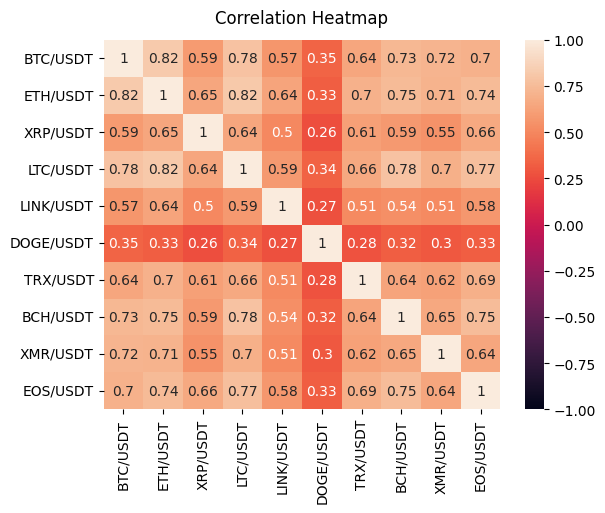

In [ ]:
# %%

df_log_ret = np.log(df_close).diff()
heatmap = sns.heatmap(df_ret.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# %%

# Get summary statistics
summary_df = summary_statistics(df_log_ret)

# Print the summary statistics table
print(summary_df)

               Mean  Variance  Skewness    Kurtosis   Jarque-Bera  p-value
BTC/USDT   0.000842  0.001294 -1.287105   23.206344  3.687627e+04      0.0
ETH/USDT   0.000846  0.002236 -1.155900   17.799202  1.994007e+04      0.0
XRP/USDT   0.000007  0.003079  0.535176   21.322355  2.993793e+04      0.0
LTC/USDT  -0.000250  0.002500 -0.723438   12.721772  8.585886e+03      0.0
LINK/USDT  0.001869  0.004158 -0.338512   12.131191  7.451014e+03      0.0
DOGE/USDT  0.001560  0.004911  5.994859  124.813077  1.331541e+06      0.0
TRX/USDT   0.000449  0.002609 -0.753834   15.785370  1.473003e+04      0.0
BCH/USDT  -0.000517  0.003280 -0.319148   18.059696  2.019257e+04      0.0
XMR/USDT  -0.000047  0.002271 -1.292633   20.081843  2.652679e+04      0.0
EOS/USDT  -0.000997  0.003326 -0.511082   14.849103  1.257102e+04      0.0
